In [0]:
import random
import heapq
import timeit
import numpy as np
import pandas as pd

### 1. Three-Way Merge Sort

In [35]:
def three_merge_sort(a):
    '''Splits a list into three equal parts recursively until 
    the sub-lists are smaller or equal to 3. Returns sorted list.
    '''
    if len(a) >= 3:
        start = 0
        end = len(a) // 3

        # creates three sub-lists storing the left, middle and right
        # part of the input list, recursively
        L = three_merge_sort(a[:end])
        M = three_merge_sort(a[end:end * 2])
        R = three_merge_sort(a[end * 2:])
    
        # merges the split lists using heap structure
        a = [x for x in heapq.merge(L, M, R)]

    elif len(a) == 2:
        # swap the two elements
        if a[0]>a[1]:
          a[0], a[1] = a[1], a[0]
        
    else:
        return a      

    return a
  
random_array = random.sample(range(1, 100), 20)
three_merge_sort(random_array[:])

[1, 6, 9, 16, 25, 29, 32, 43, 44, 52, 60, 76, 77, 79, 82, 89, 93, 95, 96, 97]

### 2. Three-Way Merge Sort Calling Insertion Sort

In [34]:
def insertion_sort(A):
    '''Help function for merge_insortion_sort.'''
    for j in range(1, len(A)): 
        key = A[j]
        i = j-1
        while i >= 0 and A[i] > key: 
            A[i+1] = A[i]
            i -= 1   
        A[i+1] = key
    return A

def merge_insertion_sort(a):
    '''Splits a list into three equal parts recursively until 
    the sub-lists are smaller or equal to 3, after which insertion
    sort is applied. Returns sorted list.
    '''
    if len(a) >= 43: # 43 since this is the time when insertion sort
                     # is faster than merge sort
        start = 0
        end = len(a) // 3

        L = three_merge_sort(a[:end])
        M = three_merge_sort(a[end:end * 2])
        R = three_merge_sort(a[end * 2:])
    
        a = [x for x in heapq.merge(L, M, R)]
    
    else:
        # Calls insertion sort when lists are equal or below 43
        insertion_sort(a)
    return a
  
random_array = random.sample(range(1, 100), 20)
merge_insertion_sort(random_array[:])


[6, 7, 10, 12, 28, 29, 30, 40, 46, 54, 62, 73, 75, 81, 82, 84, 87, 92, 94, 98]

### 3. (Optional) K-Way Merge Sort

In [4]:
def kway_merge_sort(a, k=10):
    '''Splits a list into k-chosen equal parts recursively, sorts
    viea heap merge, and returns a sorted list.
    '''
    # Only starts the merge sort if the list is larger than specified k
    if len(a) > k:
        
        # Specifies the end of the sub-list
        end = len(a)//k
        if end == 0:
            end = 1
        
        #keeps track of k parts of the array
        k_lol = []
        
        # Iterates through the initial array k-times, calling itself
        # recursively for each k until each sub array is smaller than k
        for i in range(k):
            sub_list = kway_merge_sort(a[end*(i):end*(i+1)], k)
            k_lol.append(sub_list)
        
        # Merges the sorted k sub-arrays via heap structure
        a = [x for x in heapq.merge(*k_lol)]
    
    else:
        # Sorts the lists when smaller than k
        a.sort()
    
    return a
  
random_array = random.sample(range(1, 10000), 20)
print(kway_merge_sort(random_array[:], 10))

[506, 696, 732, 790, 976, 1061, 1172, 2106, 2259, 2636, 2723, 2812, 2912, 3636, 5379, 6182, 6354, 6642, 6897, 8210]


### 4. Run Times Analysis (Prep)

In [57]:
# Merge sort from https://www.geeksforgeeks.org/merge-sort/

def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
 
    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)
 
    # Copy data to temp arrays L[] and R[]
    for i in range(0 , n1):
        L[i] = arr[l + i]
 
    for j in range(0 , n2):
        R[j] = arr[m + 1 + j]
 
    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
 
    while i < n1 and j < n2 :
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
 
    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
 
    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

# l is for left index and r is right index of the
# sub-array of arr to be sorted
def merge_sort(a,l=0,r=19):
    if l < r:
 
        # Same as (l+r)/2, but avoids overflow for
        # large l and h
        m = (l+(r-1))/2
 
        # Sort first and second halves
        merge_sort(a, l, m)
        merge_sort(a, m+1, r)
        merge(a, l, m, r)
        
    return a


random_array = random.sample(range(1, 10000), 20)
print(merge_sort(random_array[:],0,19))

[966, 1545, 2198, 2488, 2952, 3384, 3770, 4279, 5015, 5333, 6468, 6558, 6772, 6920, 6951, 7416, 8452, 8865, 9012, 9977]


### 4. Run Time Analysis

In [0]:
#Compare Algorithm Performances

from time import time
import matplotlib.pyplot as plt
%matplotlib inline

def test_algorithm(func,a):
    '''Measures the running time of a function.'''
    start_time = time()
    func(a)
    total_time = time() - start_time
    return total_time

def test_all_algorithms(n_repeats=10):
    '''Compares the running time of algorithms for different
    array lengths, and returns a data frame storing array length and
    running time.
    '''
    
    # Arrays to store the running time means for each array length
    time_2_way = []
    time_3_way = []
    time_3_insertion = []
    time_k_way = []
    
    # Temporary arrays to store specific array length running times
    temp_time_2_way = []
    temp_time_3_way = []
    temp_time_3_insertion = []
    temp_time_k_way = []
    
    list_of_lengths = range(100,10000,100)
    # Arrays increases by a constant addition of 100
    
    for length in list_of_lengths:
        for i in range(n_repeats):
            a = random.sample(range(1,10000), length)
            # arrays are randomly sampled from between 1-10000
            # at a length specified by the outer for loop
            # with a repetition specified by the inner for loop
            
            l = 0
            r = len(a)-1
            k = 5
            
            temp_time_2_way.append(test_algorithm(merge_sort, a[:]))
            temp_time_3_way.append(test_algorithm(three_merge_sort, a[:]))
            temp_time_3_insertion.append(test_algorithm(merge_insertion_sort, a[:]))
            temp_time_k_way.append(test_algorithm(kway_merge_sort, a[:]))
            
        time_2_way.append(np.mean(temp_time_2_way)*1000)
        time_3_way.append(np.mean(temp_time_3_way)*1000)
        time_3_insertion.append(np.mean(temp_time_3_insertion)*1000)
        time_k_way.append(np.mean(temp_time_k_way)*1000)
        # running times multiplied by 1000 to attain milliseconds
    
    global df
    df = pd.DataFrame(
    {'(0) Array Length': list_of_lengths,
     '(1) 2-Way': time_2_way,
     '(2) 3-Way': time_3_way,
     '(3) 3-Insert': time_3_insertion,
     '(4) K-Way': time_k_way
     })

In [0]:
test_all_algorithms()
#in milliseconds

In [83]:
#print dataframe at array length 100, 1000 and 9900
df.iloc[[0,9,98], :]

,(0) Array Length,(1) 2-Way,(2) 3-Way,(3) 3-Insert,(4) K-Way
0,100,0.072503,0.406575,0.414753,0.089931
9,1000,0.055707,2.220130,2.213495,0.814726
98,9900,0.058299,24.750702,24.784399,9.935895


Text(0.5,1,u'Runtimes Overview')

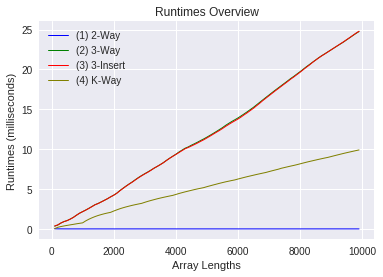

In [84]:
#plot data
plt.plot('(0) Array Length', '(1) 2-Way', data=df, marker = '', color='b', linewidth=1)
plt.plot('(0) Array Length', '(2) 3-Way', data=df, marker = '', color='g', linewidth=1)
plt.plot('(0) Array Length', '(3) 3-Insert', data=df, marker = '', color='r', linewidth=1)
plt.plot('(0) Array Length', '(4) K-Way', data=df, marker = '', color='olive', linewidth=1)
plt.legend()
plt.ylabel('Runtimes (milliseconds)')
plt.xlabel('Array Lengths')
plt.title('Runtimes Overview')

